In [1]:
import numpy as np
from nbody_original.nbody_original import main as original_main
from nbody_cython.nbody_cython import main as cython_main
from nbody_pytorch.nbody_pytorch import main as torch_main
from nbody_dask.nbody_dask import main as dask_main

In [ ]:
number_of_particles = [5, 10, 50, 100, 500, 1000, 5000, 10000]
number_of_timesteps = [1, 10, 100]

def get_params(number_of_particles, number_of_timesteps): 
    return {
        "N": number_of_particles,
        "t": 0,
        "t_end": number_of_timesteps,
        "dt": 1,
        "softening": 0.1,
        "G": 1.0,
        "plot_real_time": False,
        "save_plot": False,
    }

execution_times = np.zeros((4, len(number_of_particles), len(number_of_timesteps)), dtype=np.float64)

In [3]:
from timeit import default_timer as timer

for i, n_particles in enumerate(number_of_particles):
    for j, n_timesteps in enumerate(number_of_timesteps):
        print(n_particles,n_timesteps)
        start_time = timer()
        original_main(**get_params(n_particles, n_timesteps))
        end_time = timer()
        execution_times[0, i, j] = end_time - start_time
        start_time = timer()
        cython_main(**get_params(n_particles, n_timesteps))
        end_time = timer()
        execution_times[1, i, j] = end_time - start_time
        start_time = timer()
        torch_main(**get_params(n_particles, n_timesteps))
        end_time = timer()
        execution_times[2, i, j] = end_time - start_time
        start_time = timer()
        dask_main(**get_params(n_particles, n_timesteps))
        end_time = timer()
        execution_times[3, i, j] = end_time - start_time

5 10
cpu
10 10
cpu
50 10
cpu
100 10
cpu
500 10
cpu
1000 10
cpu
5000 10
cpu
10000 10
cpu


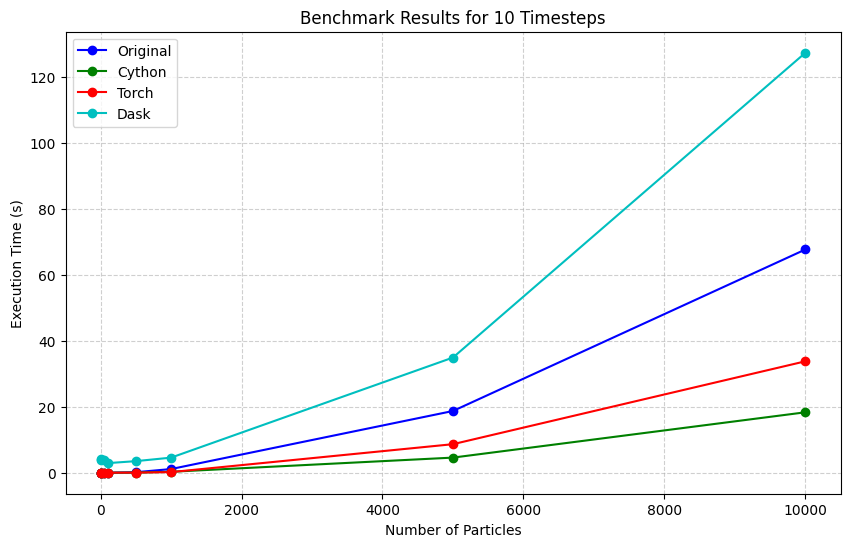

In [4]:
import matplotlib.pyplot as plt
labels = ['Original', 'Cython', 'Torch', 'Dask']
colors = ['b', 'g', 'r', 'c']

for j, n_timesteps in enumerate(number_of_timesteps):
    plt.figure(figsize=(10, 6))
    for method_idx in range(4):
        plt.plot(
            number_of_particles, 
            execution_times[method_idx, :, j], 
            marker='o', linestyle='-', color=colors[method_idx], label=labels[method_idx]
        )
    
    plt.xlabel("Number of Particles")
    plt.ylabel("Execution Time (s)")
    plt.title(f"Benchmark Results for {n_timesteps} Timesteps")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()